Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
pd.read_csv?

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


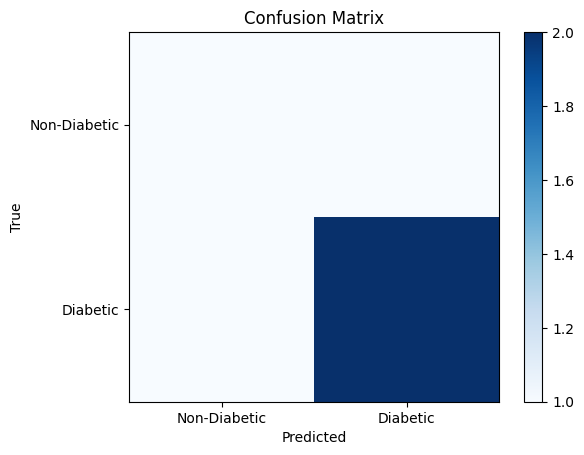

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# True labels for a set of instances
true_labels = [1, 0, 1, 0, 1]  # Example true labels

# Predicted labels for a set of instances
predicted_labels = [1, 0, 1, 1, 0]  # Example predicted labels

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix graph
labels = ['Non-Diabetic', 'Diabetic']
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


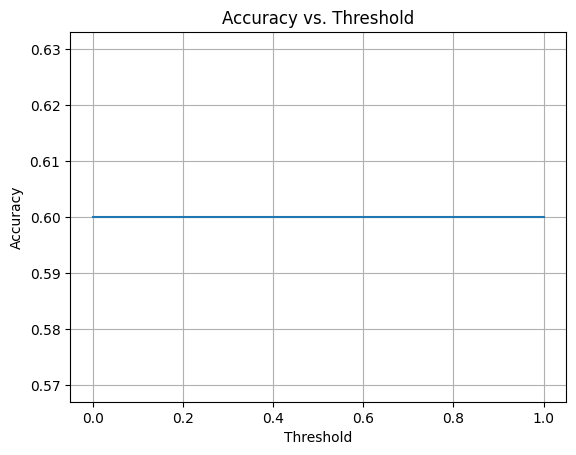

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# True labels for multiple instances
true_labels = [1, 0, 1, 0, 1]  # Example true labels
# Predicted labels for multiple instances
predicted_labels = [1, 0, 1, 1, 0]  # Example predicted labels
# Range of threshold values
thresholds = np.linspace(0, 1, 100)
# Calculate accuracy for each threshold
accuracies = []
for threshold in thresholds:
    # Apply threshold to predicted labels
    thresholded_labels = [1 if pred >= threshold else 0 for pred in predicted_labels]
    # Calculate accuracy
    accuracy = accuracy_score(true_labels, thresholded_labels)
    accuracies.append(accuracy)
# Plot accuracy graph
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)
plt.show()

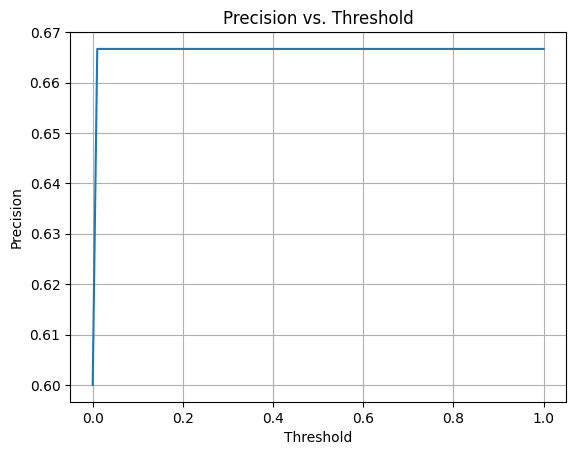

In [ ]:
import numpy as np
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
# True labels for multiple instances
true_labels = [1, 0, 1, 0, 1]  # Example true labels
# Predicted labels for multiple instances
predicted_labels = [1, 0, 1, 1, 0]  # Example predicted labels
# Range of threshold values
thresholds = np.linspace(0, 1, 100)
# Calculate precision for each threshold
precisions = []
for threshold in thresholds:
    # Apply threshold to predicted labels
    thresholded_labels = [1 if pred >= threshold else 0 for pred in predicted_labels]
    # Calculate precision
    precision = precision_score(true_labels, thresholded_labels)
    precisions.append(precision)
# Plot precision graph
plt.plot(thresholds, precisions)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold')
plt.grid(True)
plt.show()


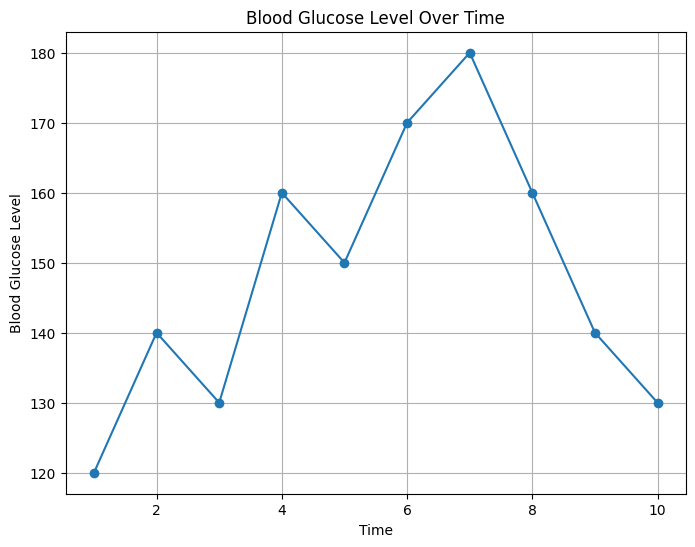

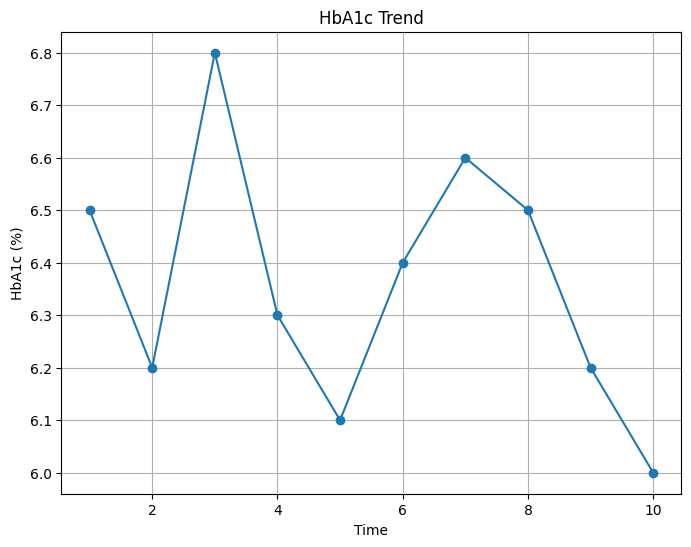

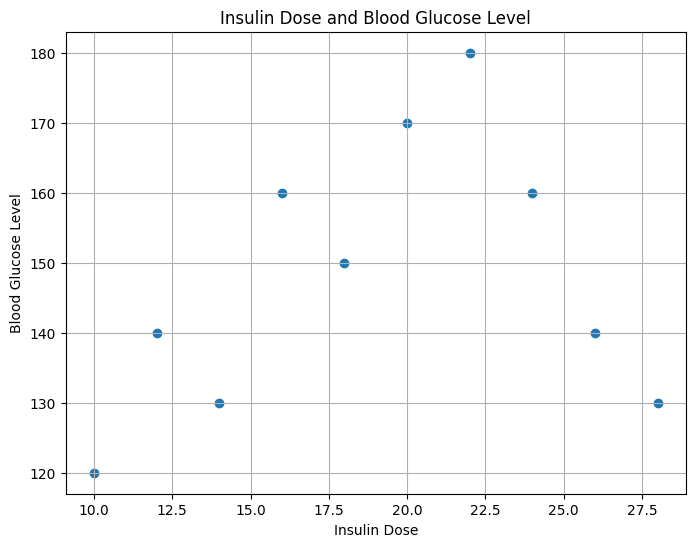

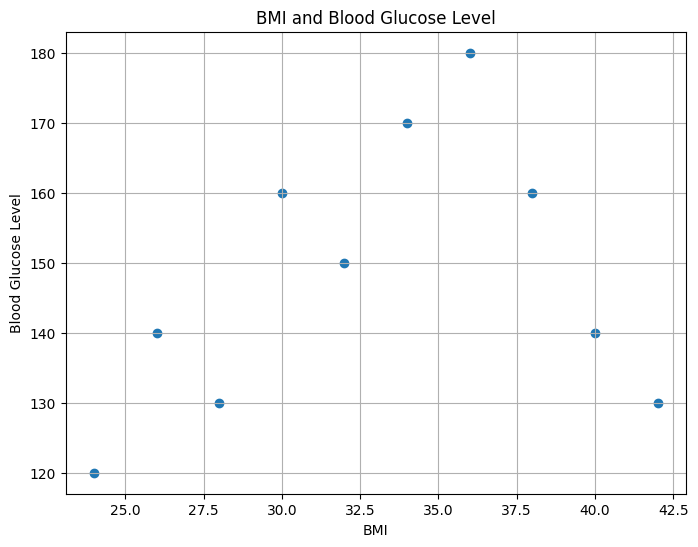

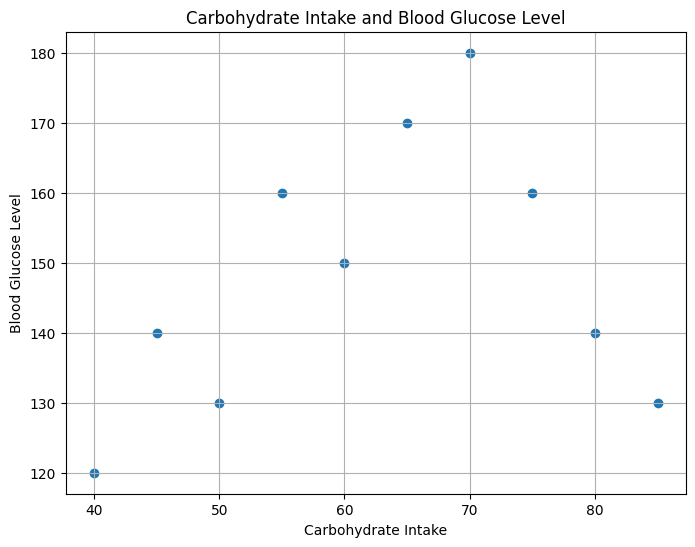

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for blood glucose level over time
time = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
glucose_level = np.array([120, 140, 130, 160, 150, 170, 180, 160, 140, 130])

# Line graph: Blood Glucose Level Over Time
plt.figure(figsize=(8, 6))
plt.plot(time, glucose_level, marker='o')
plt.xlabel('Time')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level Over Time')
plt.grid(True)
plt.show()

# Example data for HbA1c trend
time = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hba1c = np.array([6.5, 6.2, 6.8, 6.3, 6.1, 6.4, 6.6, 6.5, 6.2, 6.0])

# Line graph: HbA1c Trend
plt.figure(figsize=(8, 6))
plt.plot(time, hba1c, marker='o')
plt.xlabel('Time')
plt.ylabel('HbA1c (%)')
plt.title('HbA1c Trend')
plt.grid(True)
plt.show()

# Example data for insulin dose and blood glucose level
insulin_dose = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])
glucose_level = np.array([120, 140, 130, 160, 150, 170, 180, 160, 140, 130])

# Scatter plot: Insulin Dose and Blood Glucose Level
plt.figure(figsize=(8, 6))
plt.scatter(insulin_dose, glucose_level)
plt.xlabel('Insulin Dose')
plt.ylabel('Blood Glucose Level')
plt.title('Insulin Dose and Blood Glucose Level')
plt.grid(True)
plt.show()

# Example data for BMI and blood glucose level
bmi = np.array([24, 26, 28, 30, 32, 34, 36, 38, 40, 42])
glucose_level = np.array([120, 140, 130, 160, 150, 170, 180, 160, 140, 130])

# Scatter plot: BMI and Blood Glucose Level
plt.figure(figsize=(8, 6))
plt.scatter(bmi, glucose_level)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('BMI and Blood Glucose Level')
plt.grid(True)
plt.show()

# Example data for carbohydrate intake and blood glucose level
carbs_intake = np.array([40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
glucose_level = np.array([120, 140, 130, 160, 150, 170, 180, 160, 140, 130])

# Scatter plot: Carbohydrate Intake and Blood Glucose Level
plt.figure(figsize=(8, 6))
plt.scatter(carbs_intake, glucose_level)
plt.xlabel('Carbohydrate Intake')
plt.ylabel('Blood Glucose Level')
plt.title('Carbohydrate Intake and Blood Glucose Level')
plt.grid(True)
plt.show()
